In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.feature_selection import f_classif

In [2]:
import tcr_emb_code
import data_processing

In [3]:
data = pd.read_csv('/home/yuliajk/projects/tcr_embedding_r/vdjdb.slim.txt', sep='\t')
data = data[-data['reference.id'].str.startswith('https://www.10xgenomics')]
data = data[data['species']=='HomoSapiens']
data = data.rename(columns={'gene': 'chain'})
data

chain                cdr3      species       antigen.epitope  \
3       TRA       CASNTGTASKLTF  HomoSapiens             GILGFVFTL   
6       TRA       CAVLLEYGNKLVF  HomoSapiens             GILGFVFTL   
8       TRB  CASSAFPCREGRNNEQFF  HomoSapiens             NLVPMVATV   
12      TRB      CASSLTTESGEQYF  HomoSapiens             NLVPMVATV   
13      TRA     CLVGATTDSWGKLQF  HomoSapiens             NLVPMVATV   
...     ...                 ...          ...                   ...   
62682   TRA     CAVNSFFSDGQKLLF  HomoSapiens             NLVPMVATV   
62683   TRB    CASSRRTSGGADEQFF  HomoSapiens  FRDYVDRFYKTLRAEQASQE   
62686   TRB   CASSSSRASKSYNEQFF  HomoSapiens             NLVPMVATV   
62695   TRA      CALSEASGYSTLTF  HomoSapiens             NLVPMVATV   
62698   TRB     CASSQPQGPTDTQYF  HomoSapiens        GLIYNRMGAVTTEV   

      antigen.gene antigen.species complex.id       v.segm      j.segm  v.end  \
3                M      InfluenzaA          0    TRAV24*01   TRAJ44*01      2   
6                M      InfluenzaA          0  TRAV12-2*01   TRAJ47*01      3   
8             pp65             CMV          0   TRBV6-1*01  TRBJ2-1*01      4   
12            pp65             CMV          0   TRBV7-9*01  TRBJ2-7*01      5   
13            pp65             CMV          0     TRAV4*01   TRAJ24*01      4   
...            ...             ...        ...          ...         ...    ...   
62682         pp65             CMV          0   TRAV8-1*01         NaN      4   
62683          Gag           HIV-1          0     TRBV2*01  TRBJ2-1*01      4   
62686         pp65             CMV          0   TRBV7-9*01  TRBJ2-1*01      4   
62695         pp65             CMV          0    TRAV19*01   TRAJ11*01      5   
62698           M1      InfluenzaA          0   TRBV6-6*01  TRBJ2-3*01      4   

       j.start          mhc.a           mhc.b mhc.class  \
3            3       HLA-A*02             B2M      MHCI   
6            5       HLA-A*02             B2M      MHCI   
8           13       HLA-A*02             B2M      MHCI   
12          10       HLA-A*02             B2M      MHCI   
13          -1       HLA-A*02             B2M      MHCI   
...        ...            ...             ...       ...   
62682       -1       HLA-A*02             B2M      MHCI   
62683       12  HLA-DRA*01:01  HLA-DRB5*01:01     MHCII   
62686       10       HLA-A*02             B2M      MHCI   
62695        6       HLA-A*02             B2M      MHCI   
62698        9     HLA-DRA*01     HLA-DRB1*01     MHCII   

                                            reference.id  vdjdb.score  
3                                          PMID:28423320            0  
6                                          PMID:28423320            0  
8                                          PMID:28423320            0  
12                                         PMID:28423320            0  
13                                         PMID:28423320            0  
...                                                  ...          ...  
62682                                      PMID:28423320            0  
62683                                      PMID:27111229            0  
62686                                      PMID:28423320            0  
62695                                      PMID:28423320            0  
62698  https://github.com/antigenomics/vdjdb-db/issue...            0  

[24225 rows x 16 columns]

In [4]:
prototypes_path = '/home/yuliajk/projects/tcr_emb/data_scripts/prototypes_olga.txt'
chain = 'TRB'
file_path_prefix = 'vdjdb_trb'
file_date = '110723'

In [5]:
data = tcr_emb_code.filter_table_vdjdb(data,chain)
data = tcr_emb_code.data_filter_for_prototypes(data,prototypes_path,'v.segm','j.segm')
data_mir = tcr_emb_code.columns_prep_vdjdb(data)

In [6]:
tcr_emb_code.mir_clac(data_mir, file_path_prefix, file_date, chain, prototypes_path,False)

In [7]:
data_dists_raw_path = 'data_scripts/' + file_path_prefix + file_date + '.dist.txt'
data_dists_raw = pd.read_csv(data_dists_raw_path, sep = '\t')
data_c_b_dist = tcr_emb_code.mir_dists_format(data_dists_raw, data,'cdr3')
data_c_b_dist

cdr3_1  cdr3_10  cdr3_100  cdr3_1000  cdr3_1001  \
cdr3                                                                  
CASSAFPCREGRNNEQFF    23.0     29.0      21.0       22.0       18.0   
CASSLTTESGEQYF        22.0     35.0      26.0       23.0       16.0   
CASSLGTLEETQYF        20.0     40.0      20.0       23.0       11.0   
CASIPEGGRETQYF        15.0     27.0      23.0       18.0       14.0   
CASSLDSLNTIYF         14.0     18.0      12.0       14.0        1.0   
...                    ...      ...       ...        ...        ...   
CASSRLAGGTGELFF       32.0     18.0      15.0       13.0        4.0   
CASSLEAADNYGYTF       14.0     12.0       8.0       16.0        8.0   
CASSRRTSGGADEQFF      25.0     32.0      21.0       15.0       20.0   
CASSSSRASKSYNEQFF     39.0     24.0      22.0       17.0       26.0   
CASSQPQGPTDTQYF       20.0     30.0      20.0       12.0       18.0   

                    cdr3_1002  cdr3_1003  cdr3_1004  cdr3_1005  cdr3_1006  \
cdr3                                                                        
CASSAFPCREGRNNEQFF       21.0       16.0       29.0       51.0       19.0   
CASSLTTESGEQYF           11.0       21.0       29.0       30.0       30.0   
CASSLGTLEETQYF            0.0       23.0       30.0       16.0       47.0   
CASIPEGGRETQYF           17.0       26.0       29.0       18.0       40.0   
CASSLDSLNTIYF             3.0       23.0       19.0       11.0       22.0   
...                       ...        ...        ...        ...        ...   
CASSRLAGGTGELFF          25.0        5.0       28.0       27.0       19.0   
CASSLEAADNYGYTF          12.0        9.0       25.0       10.0       16.0   
CASSRRTSGGADEQFF         30.0       18.0       32.0       45.0       29.0   
CASSSSRASKSYNEQFF        10.0       15.0       27.0       45.0       16.0   
CASSQPQGPTDTQYF          10.0       25.0       34.0       27.0       46.0   

                    ...  j_990  j_991  j_992  j_993  j_994  j_995  j_996  \
cdr3                ...                                                    
CASSAFPCREGRNNEQFF  ...   85.0   49.0   62.0   62.0   85.0   62.0   62.0   
CASSLTTESGEQYF      ...   62.0   42.0   60.0   81.0   62.0   81.0   60.0   
CASSLGTLEETQYF      ...   54.0   37.0   65.0   54.0   54.0   54.0   65.0   
CASIPEGGRETQYF      ...   54.0   37.0   65.0   54.0   54.0   54.0   65.0   
CASSLDSLNTIYF       ...   35.0   43.0   41.0   35.0   35.0   35.0   41.0   
...                 ...    ...    ...    ...    ...    ...    ...    ...   
CASSRLAGGTGELFF     ...   49.0   81.0   45.0   42.0   49.0   42.0   45.0   
CASSLEAADNYGYTF     ...   41.0   38.0   41.0   43.0   41.0   43.0   41.0   
CASSRRTSGGADEQFF    ...   85.0   49.0   62.0   62.0   85.0   62.0   62.0   
CASSSSRASKSYNEQFF   ...   85.0   49.0   62.0   62.0   85.0   62.0   62.0   
CASSQPQGPTDTQYF     ...   62.0   45.0   84.0   60.0   62.0   60.0   84.0   

                    j_997  j_998  j_999  
cdr3                                     
CASSAFPCREGRNNEQFF   54.0   54.0   85.0  
CASSLTTESGEQYF       54.0   54.0   62.0  
CASSLGTLEETQYF       78.0   78.0   54.0  
CASIPEGGRETQYF       78.0   78.0   54.0  
CASSLDSLNTIYF        32.0   32.0   35.0  
...                   ...    ...    ...  
CASSRLAGGTGELFF      37.0   37.0   49.0  
CASSLEAADNYGYTF      35.0   35.0   41.0  
CASSRRTSGGADEQFF     54.0   54.0   85.0  
CASSSSRASKSYNEQFF    54.0   54.0   85.0  
CASSQPQGPTDTQYF      65.0   65.0   62.0  

[16666 rows x 9000 columns]

In [8]:
pc_n = 3000
pca_df, pca_model = data_processing.pca(data_c_b_dist,pc_n)
pca_df_data = pca_df.copy()
pca_df_data['cdr3']=data_c_b_dist.index
pca_df_data['antigen.epitope']=data['antigen.epitope']
pca_df_data['j.segm']=data['j.segm']
pca_df_data['v.segm']=data['v.segm']
#pca_df_data=pca_df_data.merge(data[['cdr3','antigen.epitope','j.segm','v.segm']], on='cdr3')
#pca_df_data= pca_df_data.groupby(['cdr3']).first().reset_index()
pca_df_data['categorical_label'] = data_processing.cat_lable(pca_df_data['antigen.epitope'])
pca_df_data.shape


(16666, 3005)

/home/yuliajk/.conda-envs/python3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/yuliajk/.conda-envs/python3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/yuliajk/.conda-envs/python3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or mis

Text(0, 0.5, '1 component')

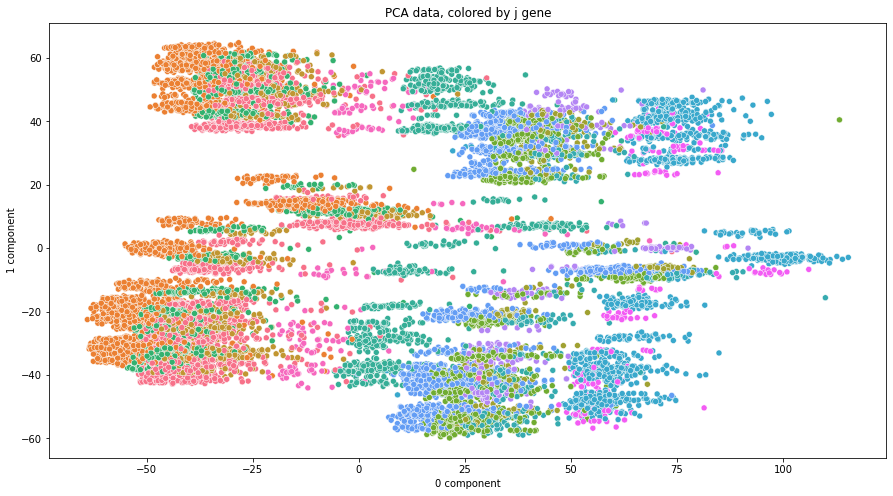

In [9]:
pc1 = 0
pc2 = 1
plt.figure(figsize=(15,8))
ax = sns.scatterplot(pc1, pc2, data=pca_df_data, hue='j.segm', legend = False)
ax.set_title("PCA data, colored by j gene")
ax.set_xlabel(str(pc1)+" component")
ax.set_ylabel(str(pc2)+" component")
plt.figure(figsize=(15,8))
ax = sns.scatterplot(pc1, pc2, data=pca_df_data, hue='v.segm',legend = False)
ax.set_title("PCA data, colored by v gene")
ax.set_xlabel(str(pc1)+" component")
ax.set_ylabel(str(pc2)+" component")
plt.figure(figsize=(15,8))
ax = sns.scatterplot(pc1, pc2, data=pca_df_data, hue='categorical_label',legend = False,palette='RdBu')
ax.set_title("PCA data, colored by antigene epitope")
ax.set_xlabel(str(pc1)+" component")
ax.set_ylabel(str(pc2)+" component")

In [10]:
pc_anova = data_processing.pc_anova(pca_df_data,pc_n, 'antigen.epitope')
pc_anova = pc_anova.sort_values('pvalue').reset_index(drop=True)
#pc_selected = list(pc_anova['pc'].head(50))

In [11]:
pc_selected = list(pc_anova['pc'].head(100))

In [12]:
import umap
from sklearn.preprocessing import StandardScaler

/home/yuliajk/.conda-envs/python3/lib/python3.6/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [13]:
scaled_pca_df = StandardScaler().fit_transform(pca_df[pc_selected])

In [14]:
reducer = umap.UMAP()
umap_df = reducer.fit_transform(scaled_pca_df)
umap_df.shape

(16666, 2)

In [15]:
umap_df_data = pd.DataFrame(umap_df)
umap_df_data['barcode'] = data_c_b_dist.index
umap_df_data['j.segm'] = data['j.segm']
umap_df_data['v.segm'] = data['v.segm']
umap_df_data['antigen.epitope'] = data['antigen.epitope']
umap_df_data['categorical_label'] = data_processing.cat_lable(umap_df_data['antigen.epitope'])

/home/yuliajk/.conda-envs/python3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/yuliajk/.conda-envs/python3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/yuliajk/.conda-envs/python3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or mis

Text(0.5, 1.0, 'UMAP of VDJdb data after PCA, colored by j gene')

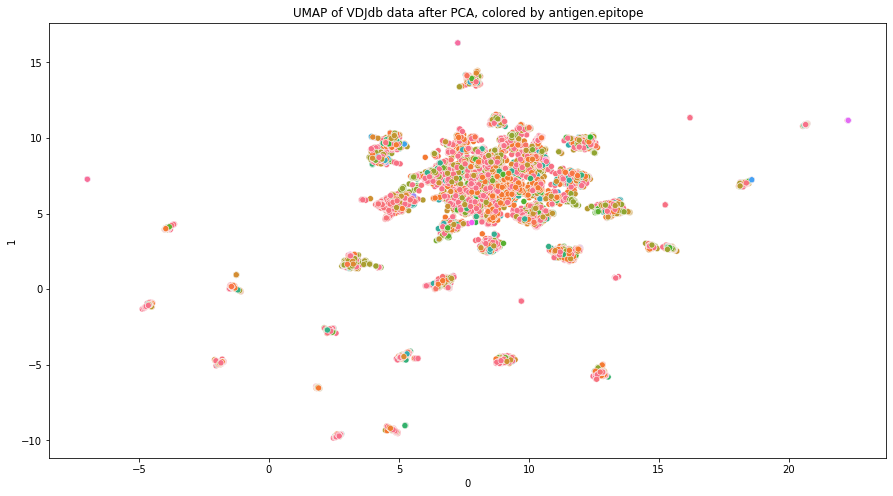

In [16]:
plt.figure(figsize=(15,8))
ax = sns.scatterplot(0, 1, data=umap_df_data, hue='antigen.epitope',legend = False)
ax.set_title("UMAP of VDJdb data after PCA, colored by antigen.epitope")
plt.figure(figsize=(15,8))
ax = sns.scatterplot(0, 1, data=umap_df_data[umap_df_data['antigen.epitope'].isin(['KLGGALQAK','AAKGRGAAL','GILGFVFTL','ELAGIGILTV','RLRAEAQVK','IVTDFSVIK'])], hue='antigen.epitope',s=10)
ax.set_title("umap_df_data of VDJdb data after PCA, colored by antigen.epitope")

plt.figure(figsize=(15,8))
sns.set_palette("husl")
ax = sns.scatterplot(0, 1, data=umap_df_data, hue='categorical_label',s=20,legend = False,palette='RdBu')
ax.set_title("umap_df_data of VDJdb data after PCA, colored by antigen.epitope")

plt.figure(figsize=(15,8))
ax = sns.scatterplot(0, 1, data=umap_df_data, hue='j.segm')
ax.set_title("UMAP of VDJdb data after PCA, colored by j gene")

In [17]:
X_embedded = data_processing.tsne(pca_df[pc_selected],2,10,20)
tsne_df = pd.DataFrame(data = X_embedded, columns = ['DM1', 'DM2'])


tsne_df_data = tsne_df.copy()
tsne_df_data['cdr3']=data_c_b_dist.index
tsne_df_data['antigen.epitope'] = data['antigen.epitope']
tsne_df_data['j.segm'] = data['j.segm']
tsne_df_data['v.segm'] = data['v.segm']
#tsne_df_data=tsne_df_data.merge(data[['cdr3','antigen.epitope','j.segm','v.segm']], on='cdr3')
#tsne_df_data= tsne_df_data.groupby(['cdr3']).first().reset_index()
tsne_df_data['categorical_label'] = data_processing.cat_lable(tsne_df_data['antigen.epitope'])
tsne_df_data['cdr3_in_epitope_count'] = tsne_df_data.groupby('antigen.epitope')['cdr3'].transform("size")
tsne_df_data['epitope_type'] = tsne_df_data['cdr3_in_epitope_count'].apply(lambda x: 'other' if x < 300 else 'class') 

tsne_df_data

DM1         DM2                cdr3       antigen.epitope  \
0     -19.941145   86.169304  CASSAFPCREGRNNEQFF             NLVPMVATV   
1     -84.820305  -49.282509      CASSLTTESGEQYF             NLVPMVATV   
2      -2.120415   99.144867      CASSLGTLEETQYF             NLVPMVATV   
3     -18.546440  -70.507698      CASIPEGGRETQYF             GLCTLVAML   
4      44.914383  -45.117722       CASSLDSLNTIYF             NLVPMVATV   
...          ...         ...                 ...                   ...   
16661  24.940136  -92.275177     CASSRLAGGTGELFF             QIKVRVKMV   
16662  74.666809  -39.499260     CASSLEAADNYGYTF             GLCTLVAML   
16663 -24.952120  -17.768475    CASSRRTSGGADEQFF  FRDYVDRFYKTLRAEQASQE   
16664 -51.248951  -85.539703   CASSSSRASKSYNEQFF             NLVPMVATV   
16665 -25.420931  103.748070     CASSQPQGPTDTQYF        GLIYNRMGAVTTEV   

        j.segm   v.segm  categorical_label  cdr3_in_epitope_count epitope_type  
0      TRBJ2-1  TRBV6-1                114                   4469        class  
1      TRBJ2-7  TRBV7-9                114                   4469        class  
2      TRBJ2-5  TRBV6-5                114                   4469        class  
3      TRBJ2-5  TRBV7-8                 51                    896        class  
4      TRBJ1-3  TRBV5-1                114                   4469        class  
...        ...      ...                ...                    ...          ...  
16661  TRBJ2-2  TRBV7-3                124                     24        other  
16662  TRBJ1-2  TRBV5-5                 51                    896        class  
16663  TRBJ2-1    TRBV2                 46                    390        class  
16664  TRBJ2-1  TRBV7-9                114                   4469        class  
16665  TRBJ2-3  TRBV6-6                 52                    121        other  

[16666 rows x 9 columns]

/home/yuliajk/.conda-envs/python3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/yuliajk/.conda-envs/python3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/yuliajk/.conda-envs/python3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or mis

Text(0.5, 1.0, 'TSNE of VDJdb data after PCA, colored by antigen.epitope')

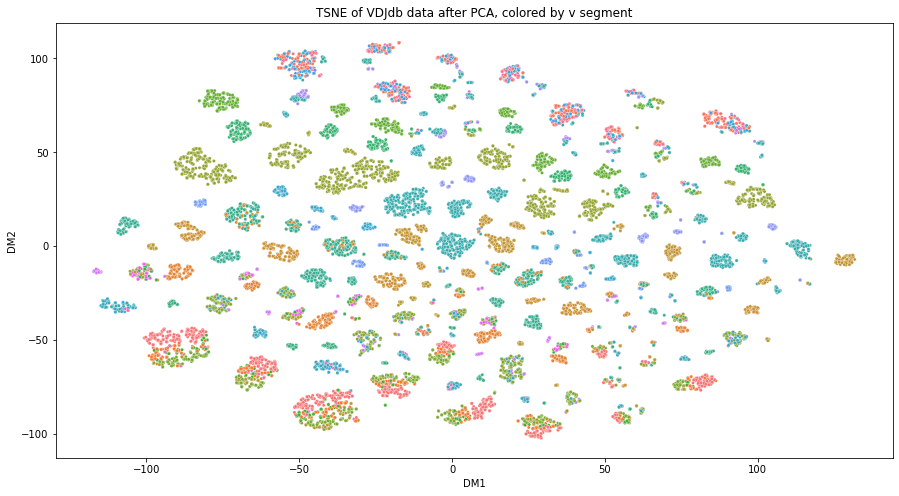

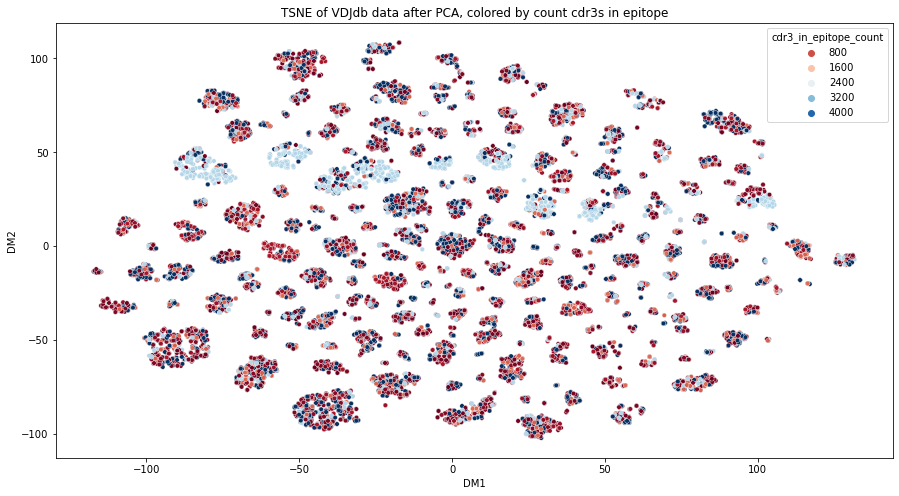

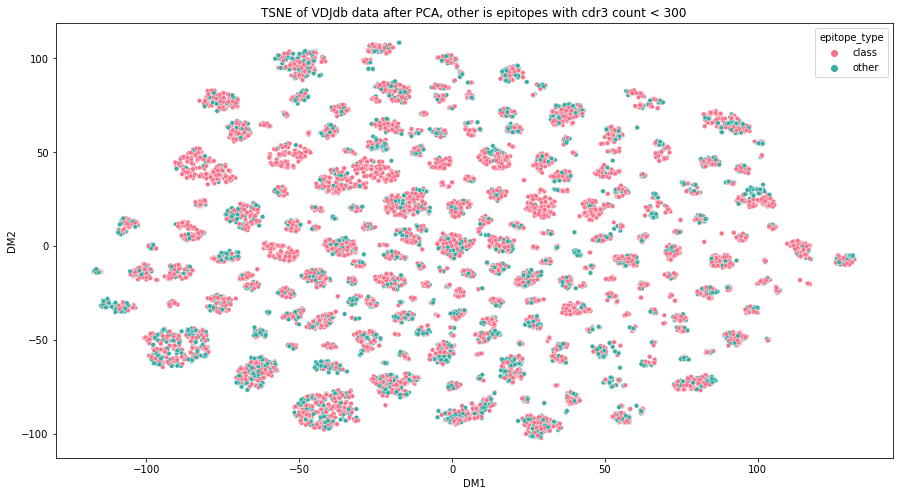

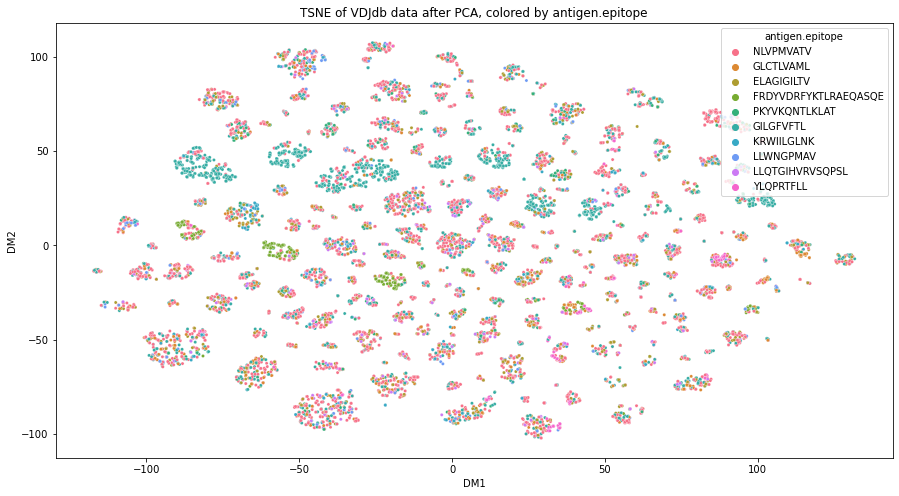

In [18]:
plt.figure(figsize=(15,8))
ax = sns.scatterplot('DM1', 'DM2', data=tsne_df_data, hue='j.segm',s=10,legend = False)
ax.set_title("TSNE of VDJdb data after PCA, colored by j segment")

plt.figure(figsize=(15,8))
ax = sns.scatterplot('DM1', 'DM2', data=tsne_df_data, hue='v.segm',s=10,legend = False)
ax.set_title("TSNE of VDJdb data after PCA, colored by v segment")

plt.figure(figsize=(15,8))
ax = sns.scatterplot('DM1', 'DM2', data=tsne_df_data[tsne_df_data['antigen.epitope'].isin(['KLGGALQAK','AAKGRGAAL','GILGFVFTL','ELAGIGILTV','RLRAEAQVK','IVTDFSVIK'])], hue='antigen.epitope',s=10)
ax.set_title("TSNE of VDJdb data after PCA, colored by antigen.epitope")

plt.figure(figsize=(15,8))
sns.set_palette("husl")
ax = sns.scatterplot('DM1', 'DM2', data=tsne_df_data, hue='cdr3_in_epitope_count',s=20,palette='RdBu')
ax.set_title("TSNE of VDJdb data after PCA, colored by count cdr3s in epitope")

plt.figure(figsize=(15,8))
sns.set_palette("husl")
ax = sns.scatterplot('DM1', 'DM2', data=tsne_df_data, hue='categorical_label',s=20,legend = False,palette='RdBu')
ax.set_title("TSNE of VDJdb data after PCA, colored by antigen.epitope")

plt.figure(figsize=(15,8))
ax = sns.scatterplot('DM1', 'DM2', data=tsne_df_data, hue= 'epitope_type' ,s=20,palette = 'husl')
ax.set_title("TSNE of VDJdb data after PCA, other is epitopes with cdr3 count < 300")

plt.figure(figsize=(15,8))
ax = sns.scatterplot('DM1', 'DM2', data=tsne_df_data[tsne_df_data['epitope_type']=='class'], hue='antigen.epitope',s=10)
ax.set_title("TSNE of VDJdb data after PCA, colored by antigen.epitope")


In [19]:
tsne_df_data[tsne_df_data['epitope_type']=='other'].drop_duplicates('antigen.epitope')['antigen.epitope']


8             YSEHPTFTSQY
11             KLSALGINAV
12              IPSINVHHY
13       QARQMVQAMRTIGTHP
14            KAFSPEVIPMF
               ...       
15011       LPEPLPQGQGTAY
16126           VMAPRTLIL
16298           LLFGYPVAV
16484          ALWGPDPAAA
16612           EEYLQAFTY
Name: antigen.epitope, Length: 158, dtype: object

In [20]:
tsne_df_data[tsne_df_data['epitope_type']=='class'].drop_duplicates('antigen.epitope')['antigen.epitope']


0                 NLVPMVATV
3                 GLCTLVAML
5                ELAGIGILTV
6      FRDYVDRFYKTLRAEQASQE
17            PKYVKQNTLKLAT
19                GILGFVFTL
67               KRWIILGLNK
72                LLWNGPMAV
83          LLQTGIHVRVSQPSL
145               YLQPRTFLL
Name: antigen.epitope, dtype: object

In [21]:
kmeans = KMeans(n_clusters=100, random_state=0).fit(pca_df)

In [22]:
clusters = pd.DataFrame(kmeans.labels_, columns= ['cluster'])
df_kmeans = pd.concat([tsne_df_data, clusters], axis = 1)

/home/yuliajk/.conda-envs/python3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/yuliajk/.conda-envs/python3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


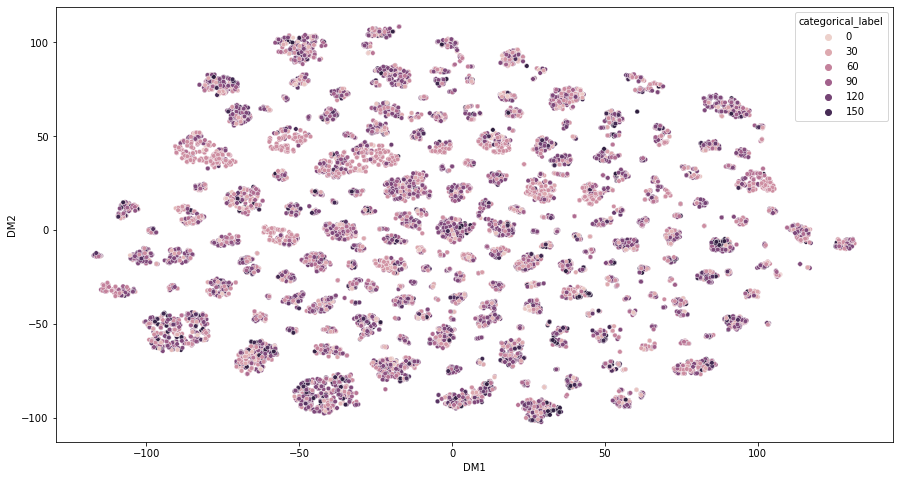

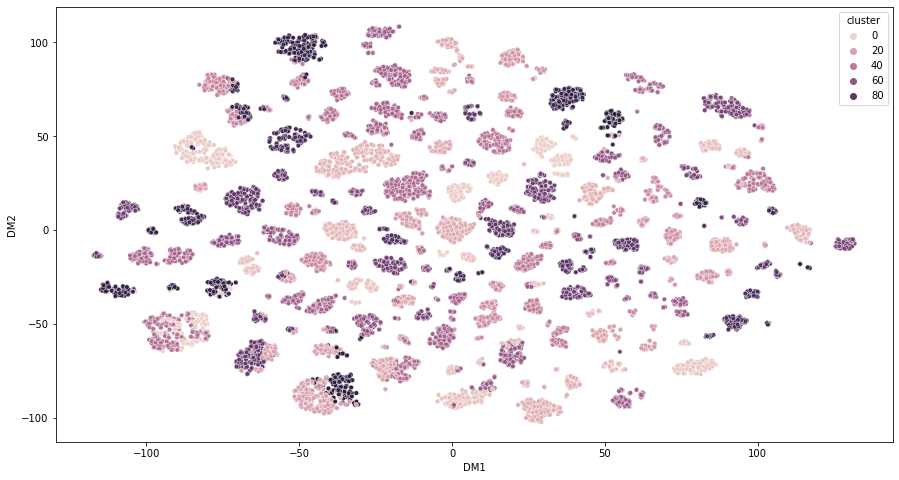

In [23]:
plt.figure(figsize=(15,8))
ax = sns.scatterplot('DM1', 'DM2', data=df_kmeans, hue='categorical_label',s=20)
#ax = sns.scatterplot('DM1', 'DM2', data=tsne_df,s=10)
#ax.text(x=0.5, y=1.1, s='TSNE of VDJdb 10x data after PCA, colored by cell.subset', fontsize=12, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
#ax.text(x=0.5, y=1.05, s='TCRemb', fontsize=10, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)
#ax.set_title("TSNE of VDJdb 10x data after PCA, colored by j segment")
plt.figure(figsize=(15,8))
ax = sns.scatterplot('DM1', 'DM2', data=df_kmeans, hue='cluster',s=20)

In [24]:
from scipy import stats

In [25]:
#binominal test
binom_df = df_kmeans.copy()
binom_df['total_cluster'] = binom_df.groupby('cluster')['cluster'].transform('count')
binom_df['total_epi'] = binom_df.groupby('antigen.epitope')['antigen.epitope'].transform('count')
binom_df['count_mached'] = binom_df.groupby(['antigen.epitope','cluster'])['antigen.epitope'].transform('count')
binom_df['fraction_matched'] = binom_df['count_mached']/binom_df['total_cluster']
binom_df['fraction_matched_exp'] = binom_df['total_epi']/len(binom_df.index)
binom_df['p_value'] = binom_df.apply(lambda row: stats.binom_test(row['count_mached'], n=row['total_cluster'], p=row['fraction_matched_exp'], alternative='greater'),axis=1)
binom_df = binom_df[binom_df['fraction_matched']>binom_df['fraction_matched_exp']]
binom_df_v = binom_df[['antigen.epitope','cluster','total_cluster','total_epi','count_mached','fraction_matched','fraction_matched_exp','p_value']].drop_duplicates().sort_values('p_value')
#binom_df_v.to_csv('data_scripts/emb_binom_df.txt',sep='\t', index = False)
binom_df_cluster = binom_df_v.copy()
binom_df_cluster = binom_df_cluster.sort_values(['fraction_matched'],ascending=False)
binom_df_cluster = binom_df_cluster.drop_duplicates('cluster',keep='first')
binom_df_cluster

antigen.epitope  cluster  total_cluster  total_epi  count_mached  \
221              GILGFVFTL       88            195       2897           168   
19               GILGFVFTL        4            318       2897           248   
61               GILGFVFTL       13            427       2897           314   
64    FRDYVDRFYKTLRAEQASQE       59            169        390           122   
141              GILGFVFTL       73            191       2897           126   
...                    ...      ...            ...        ...           ...   
57              ELAGIGILTV       94            223        975            19   
25               GLCTLVAML       77            311        896            25   
1439            ELAGIGILTV       85            128        975            10   
21               GLCTLVAML       44            309        896            23   
199             KRWIILGLNK        1            190        328            14   

      fraction_matched  fraction_matched_exp        p_value  
221           0.861538              0.173827   1.229163e-97  
19            0.779874              0.173827  1.964304e-123  
61            0.735363              0.173827  7.236796e-143  
64            0.721893              0.023401  6.169364e-158  
141           0.659686              0.173827   7.747417e-50  
...                ...                   ...            ...  
57            0.085202              0.058502   6.569870e-02  
25            0.080386              0.053762   3.072477e-02  
1439          0.078125              0.058502   2.169514e-01  
21            0.074434              0.053762   7.378538e-02  
199           0.073684              0.019681   2.886595e-05  

[100 rows x 8 columns]

In [26]:
binom_df_cluster.head(10)

antigen.epitope  cluster  total_cluster  total_epi  count_mached  \
221             GILGFVFTL       88            195       2897           168   
19              GILGFVFTL        4            318       2897           248   
61              GILGFVFTL       13            427       2897           314   
64   FRDYVDRFYKTLRAEQASQE       59            169        390           122   
141             GILGFVFTL       73            191       2897           126   
86   FRDYVDRFYKTLRAEQASQE       72            142        390            90   
147             NLVPMVATV       70            205       4469           107   
376             GILGFVFTL       42            241       2897           123   
455             GILGFVFTL       14            197       2897            99   
22              GILGFVFTL       41            242       2897           119   

     fraction_matched  fraction_matched_exp        p_value  
221          0.861538              0.173827   1.229163e-97  
19           0.779874              0.173827  1.964304e-123  
61           0.735363              0.173827  7.236796e-143  
64           0.721893              0.023401  6.169364e-158  
141          0.659686              0.173827   7.747417e-50  
86           0.633803              0.023401  1.133070e-108  
147          0.521951              0.268151   1.243591e-14  
376          0.510373              0.173827   1.206844e-32  
455          0.502538              0.173827   6.312948e-26  
22           0.491736              0.173827   1.054837e-29

In [27]:
binom_df_cluster['cluster_str']=binom_df_cluster['cluster'].astype('string')

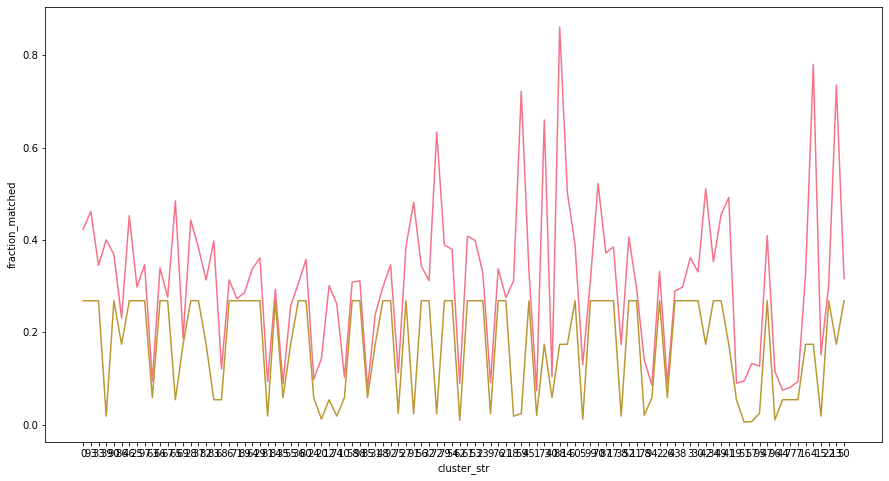

In [28]:
plt.figure(figsize=(15,8))
ax = sns.lineplot(x='cluster_str', y='fraction_matched', data=binom_df_cluster.sort_values('total_cluster'))
ax = sns.lineplot(x='cluster_str', y='fraction_matched_exp', data=binom_df_cluster.sort_values('total_cluster'))

In [30]:
ordered_df = binom_df_cluster.sort_values(by='total_cluster')
ordered_df['cluster_str'] = ordered_df['cluster'].astype('string')

Text(0, 0.5, 'Clusters')

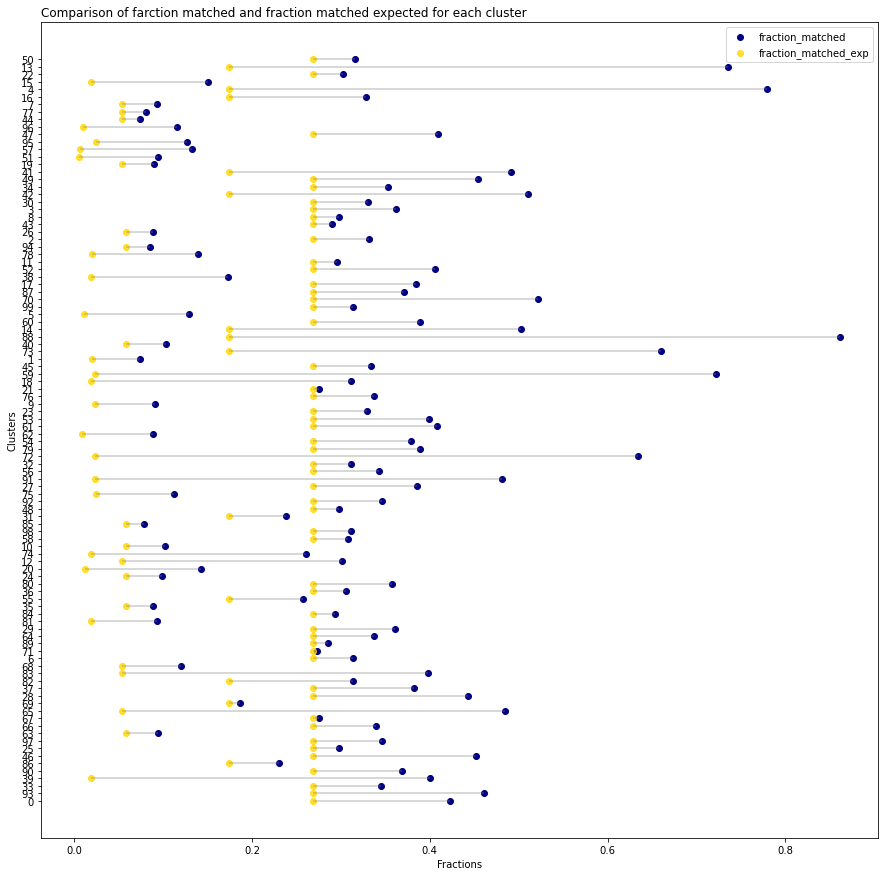

In [31]:
plt.figure(figsize=(15,15))
plt.hlines(y=ordered_df['cluster_str'], xmin=ordered_df['fraction_matched_exp'], xmax=ordered_df['fraction_matched'], color='grey', alpha=0.4)
plt.scatter(ordered_df['fraction_matched'], ordered_df['cluster_str'], color='navy', alpha=1, label='fraction_matched')
plt.scatter(ordered_df['fraction_matched_exp'], ordered_df['cluster_str'], color='gold', alpha=0.8 , label='fraction_matched_exp')
plt.legend()

# Add title and axis names
plt.title("Comparison of farction matched and fraction matched expected for each cluster", loc='left')
plt.xlabel('Fractions')
plt.ylabel('Clusters')

In [82]:
tsne_df_data_filtered = tsne_df_data[tsne_df_data['epitope_type']=='class']

In [ ]:
kmeans = KMeans(n_clusters=30, random_state=0).fit(pca_df)
clusters = pd.DataFrame(kmeans.labels_, columns= ['cluster'])
df_kmeans = pd.concat([tsne_df_data, clusters], axis = 1)
df_kmeans